### 목차

1. 통계 검정의 이해                         
2. 상관계수 검정                            
3. 두 그룹 평균 차이 검정(t검정)               
4. 세 그룹 이상 평균 차이 분석(분산분석)         
5. 범주형 변수의 교차표와 독립성 검정(카이제곱검정)

### 목표 
1. 통계 검정의 종류들에 대해 이해한다.
2. 상황마다 적절한 통계 검정에 대해 정리한다.

## 라이브러리 불러오기

In [36]:
import numpy as np
import pandas as pd

# 그래프 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

# 과학 라이브러리
from scipy import stats # 검정에 활용

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [37]:
# e : 10의 지수승 
print(1e-1)
print(30e-3)
print(3.14e+4)

0.1
0.03
31400.0


<br>
<br>

## 예제 및 실습 데이터 불러오기

In [38]:
# 보험 데이터 불러오기
df_ins = pd.read_csv('data/insurance.csv')

print(df_ins.shape)
df_ins.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [104]:
# 수치형 변수들의 기술통계량 확인
df_ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [105]:
# 변수들의 데이터타입 확인
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [41]:
# 성적 데이터 불러오기
df_sp = pd.read_csv('data/StudentsPerformance.csv')

print(df_sp.shape)
df_sp.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [42]:
# 아빠키 아들키 불러오기
df_heights = pd.read_csv('data/heights.csv')

print(df_heights.shape)
df_heights.head()

(1078, 2)


,father,son
0,165.223215,151.836806
1,160.657388,160.563662
2,164.986513,160.889747
3,167.011350,159.492645
4,155.288564,163.274070


<br>

## 1. 단일 변수 정규성 검정

In [43]:
# 정규성 검정 : 해당 데이터가 정규분포를 따르는지 확인하는 것.
# 귀무가설 : 정규분포를 따른다.
# 대립가설 : 정규분포를 따르지 않는다.

In [44]:
# 데이터 로드
df_sp = pd.read_csv('data/StudentsPerformance.csv')

print(df_sp.shape)
df_sp.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


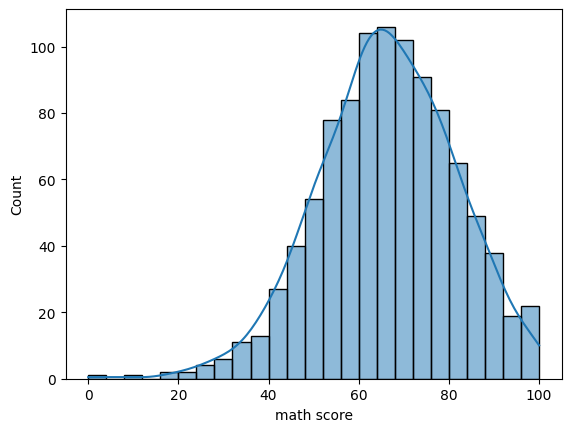

In [45]:
sns.histplot(data=df_sp, x='math score', kde=True)
plt.show()

In [46]:
# 왼쪽 꼬리가 굉장히 긴 데이터(right skew)

In [47]:
# 귀무가설 : 데이터 분포가 정규분포를 따른다.
# 대립가설 : 데이터 분포가 정규분포를 안 따른다.

# 결측치 확인
df_sp['math score'].isnull().sum()

0

In [48]:
# shapiro() : 정규성 검정
stats.shapiro(df_sp['math score']) 

ShapiroResult(statistic=0.9931488633155823, pvalue=0.000144938996527344)

In [49]:
# P-value < 0.05 => 'math score'는 정규분포를 따르지 않는다.
# 보통 이상치 데이터들 때문에 데이터가 치우쳐져서 정규분포를 따르지 않게 된다. => 이상치를 제거하면 정규분포를 따르지 않을까?

### 이상치 데이터를 제거해보자

In [50]:
df_sp2 = df_sp[df_sp['math score'] > 30]

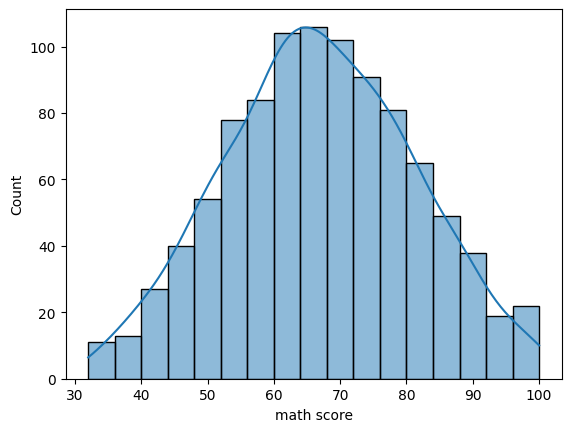

In [51]:
sns.histplot(data=df_sp2, x='math score', kde=True)
plt.show()

In [52]:
stats.normaltest(df_sp2['math score'])

NormaltestResult(statistic=13.349093831378651, pvalue=0.001262644540694293)

In [53]:
# 여전히 p-value < 0.05 
# math score 분포는 정규분포를 따르지 않는다.

## 2. 상관계수 검정

In [54]:
# pandas의 corr()로 상관계수 계산
df_heights.corr()

,father,son
father,1.000000,0.501338
son,0.501338,1.000000


In [55]:
# numpy의 corrcoef()로 상관계수 계산
corr_actual = np.corrcoef(df_heights['father'], df_heights['son'])[0, 1]
corr_actual

0.501338311172343

In [56]:
val_n = df_heights['father'].count()
val_n

1078

In [57]:
# 수식에 따라 t값 계산
t_actual = np.sqrt(val_n-2)*corr_actual / np.sqrt(1-corr_actual**2)
t_actual

19.006175890429596

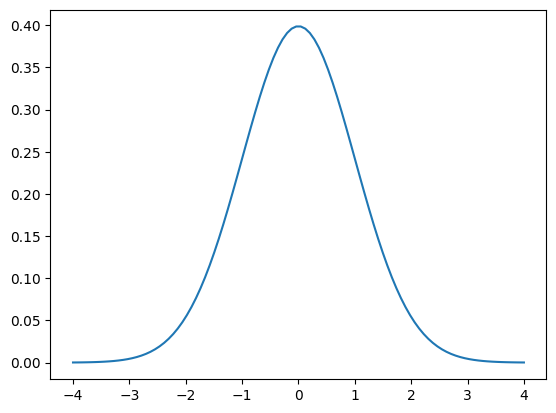

In [58]:
# (참고)t분포 확인
x = np.linspace(-4, 4, 100)
rv = stats.t(df=val_n - 2)
sns.lineplot(x=x, y=rv.pdf(x))

plt.show();

In [59]:
# p-value 계산
(1 - rv.cdf(t_actual))*2

0.0

In [60]:
# 해석 : 귀무가설 기준으로 상관계수 0.5가 나올 확률은 0.00.......... 이다.
# 즉, 아버지와 아들의 키의 상관계수 0.5는 유의미하다.

<br>

### scipy로 상관분석

In [61]:
from scipy import stats

# 상관계수 계산 및 p-value 계산
res = stats.pearsonr(df_heights['father'], df_heights['son'])
res

PearsonRResult(statistic=0.5013383111723431, pvalue=1.1212675496318386e-69)

In [62]:
# 해석 : p-value < 0.05 이므로 귀무가설 기각.  
# 따라서 아빠키와 아들키는 유의미한 양의 상관을 가진다고 할 수 있다.  


<br>

## 3. 두 그룹 평균 차이 검정(t검정)

In [63]:
print(df_heights.shape)
df_heights.head(3)

(1078, 2)


,father,son
0,165.223215,151.836806
1,160.657388,160.563662
2,164.986513,160.889747


In [64]:
# 세대별 키 평균 계산
df_heights.mean()

father    171.925226
son       174.457537
dtype: float64

In [65]:
# 기초통계량은 describe 함수로도 구할 수 있다.
df_heights.describe()

,father,son
count,1078.000000,1078.000000
mean,171.925226,174.457537
std,6.971966,7.149342
min,149.880320,148.607983
25%,167.100847,170.005331
50%,172.127164,174.284183
75%,176.791569,178.983564
max,191.602182,199.046567


In [66]:
# 정규성 검정을 통과했다고 가정
stats.ttest_ind(df_heights['father'], df_heights['son'])

Ttest_indResult(statistic=-8.325919805445935, pvalue=1.467507588054212e-16)

In [67]:
# 아빠들의 키와 아들들의 키의 차이에 대한 검정(T-test) 결과
# => "아빠키와 아들키에는 유의미한 차이가 있다고 할 수 있다."

#### [참고] 정규성 검정과 비모수 검정

In [68]:
# 각 변수의 정규성 검정
stats.shapiro(df_heights['son'])
# stats.shapiro(df_heights['father'])
    ## 아들 키는 정규성 가정을 충족하지 못함
    ## --> 분포 가정이 없는 Kruskal-Wallis 순위합 검정 수행

ShapiroResult(statistic=0.9964215755462646, pvalue=0.014193939976394176)

In [69]:
# 비모수 검정
stats.kruskal(df_heights['father'], df_heights['son'])
    ## "아빠키와 아들키에는 유의미한 차이가 있다고 할 수 있다."
    ## Kruskal-Wallis 검정은 세 그룹 이상의 평균 비교(ANOVA)에서도 활용

KruskalResult(statistic=64.2712657832806, pvalue=1.0841541123431389e-15)

<br>

#### [실습] 두 그룹의 평균 비교 및 검정
 
1. 아래의 명령어를 실행하고 '남자수학점수'와 '여자수학점수' 데이터를 생성
2. *np.mean()* 을 활용하여 성별 평균 수학점수를 각각 계산
3. *stats.ttest_ind()* 를 활용하여 두 그룹 평균 차이의 유의성에 대한 검정 수행

In [70]:
# 1. 아래의 명령어를 실행하고 '남자수학점수'와 '여자수학점수' 데이터를 생성
math_male = np.array(df_sp[df_sp['gender']=='male']['math score'])
math_female = np.array(df_sp[df_sp['gender']!='male']['math score'])

print(math_male[:10])
print(math_female[:10])

[47 76 40 64 58 40 78 88 46 66]
[72 69 90 71 88 38 65 50 69 18]


In [71]:
# 2. np.mean() 을 활용하여 성별 평균 수학점수를 각각 계산


In [72]:
# 3. stats.ttest_ind() 를 활용하여 두 그룹 평균 차이의 유의성에 대한 검정 수행


<br>
<hr>
<br>

## 4.  세 그룹 이상 평균 차이 분석(분산분석)

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats # 검정에 활용

# 보험 데이터 불러오기
df_ins = pd.read_csv('data/insurance.csv')

In [74]:
# 전체 평균
df_ins['charges'].mean()

13270.422265141257

In [75]:
# 그룹별 평균 계산
df_ins.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

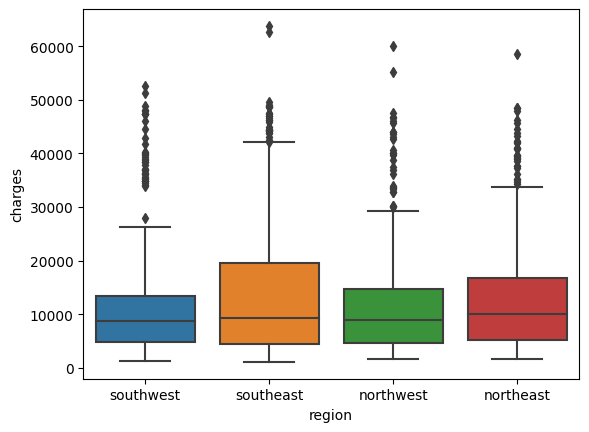

In [76]:
# 그룹별 상자그림
sns.boxplot(data=df_ins, x='region', y='charges')
plt.show();

<br>

### 4-1. scipy를 활용한 분산분석

###  네 지역의 charges는 평균이 차이가 날까? 

In [77]:
# 지역별 데이터 분할
g1 = df_ins[df_ins['region']=='northeast']['charges']
g2 = df_ins[df_ins['region']=='northwest']['charges']
g3 = df_ins[df_ins['region']=='southeast']['charges']
g4 = df_ins[df_ins['region']=='southwest']['charges']

In [78]:
# 정규성 검정
stats.shapiro(g1), stats.shapiro(g2), stats.shapiro(g3), stats.shapiro(g4)
  ## p-value < 0.05
  ## "charges는 정규분포를 따르지 않는다고 할 수 있다." 
  ## "정규분포를 따르지 않는다고 할 수 있다" -> 비모수 검정
  ## 정규성 가정하고 아래의 등분산 검정 수행

(ShapiroResult(statistic=0.8353428840637207, pvalue=6.552730011610829e-18),
 ShapiroResult(statistic=0.8128032684326172, pvalue=4.268387928586811e-19),
 ShapiroResult(statistic=0.8242298364639282, pvalue=1.23268419436607e-19),
 ShapiroResult(statistic=0.7842952609062195, pvalue=2.023667803366432e-20))

In [79]:
# 등분산 검정
stats.bartlett(g1, g2, g3, g4)
    ## p-value < 0.05
    ## "분산이 다르다고 할 수 있다." -> Welch ANOVA 활용
    ## 등분산을 가정하고 아래의 ANOVA 수행

BartlettResult(statistic=25.882548015902767, pvalue=1.0092988086670753e-05)

In [80]:
# 분산분석(f_oneway 함수) 실행
stats.f_oneway(g1, g2, g3, g4)

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

> **[해석]**  
> (정규성과 등분산을 가정한 상태에서)  
> p < 0.05 \
> 네 지역의 charges의 평균에는 유의미한 차이가 있다고 할 수 있다.

<br>

### 4-2. statsmodels를 활용한 분산분석

매번 데이터를 분할하는 것은 쉽지 않기 때문에 **statsmodels** 라이브러리 활용 추천

In [81]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [82]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# C : Categorical(범주형) 변수 의미
model = ols("charges ~ C(region)", df_ins).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(region),3.0,1.300760e+09,4.335866e+08,2.969627,0.030893
Residual,1334.0,1.947735e+11,1.460071e+08,NaN,NaN


In [83]:
# 해석 : F값에 따른 p-value가 0.03 < 0.05 이므로, 
# 지역 별 평균 차이는 유의미하다.

### (교재) F값 계산(분산분석) 예제 - 팀 당 5명씩인 3팀 간 평균 비교

In [84]:
from scipy.stats import f

f_value = 1.08  # F값
dft = 2         # 그룹 간 자유도(k-1), # k는 그룹 수
dfe = 12        # 그룹 내 자유도(n-k)  # n은 관측치 수

p_value = f.sf(f_value, dft, dfe)
print("p-value:", p_value)

p-value: 0.3704315391783546


In [85]:
# 해석 : p-value > 0.05 이므로 귀무가설 채택(그룹 간 평균 차이가 유의미하지 않다)

<br>

#### [실습] 
1. 데이터 df_sp 에서 `gender`별 `math_score`의 평균을 계산하고 상자그림 그리기
2. 1의 두 변수를 활용해서 **statsmodels** 라이브러리로 분산분석 수행하기
3. 데이터 df_sp에서 `parental level of education`별 `reading_score`의 평균 계산하기
4. 3의 두 변수를 활용해서 **statsmodels**로 분산분석 수행하기


In [86]:
# C : Categorical(범주형) 변수 의미, 
# Q : 분산분석 시 ols에서 띄어쓰기가 있는 변수를 묶어주는 방법

<br>
<br>
<br>

## 5. 범주형 변수의 교차표와 독립성 검정(카이제곱검정)

범주형 변수의 교차표를 활용해 두 변수의 관계가 통계적으로 유의미한지 판단 가능

In [87]:
import numpy as np
import pandas as pd

# 그래프 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

# 과학 라이브러리
from scipy import stats # 검정에 활용

In [88]:
# 보험 데이터 불러오기
df_ins = pd.read_csv('data/insurance.csv')

In [89]:
# 교차표
agg = pd.crosstab(df_ins['sex'], df_ins['smoker'])
agg

smoker,no,yes
sex,,
female,547,115
male,517,159


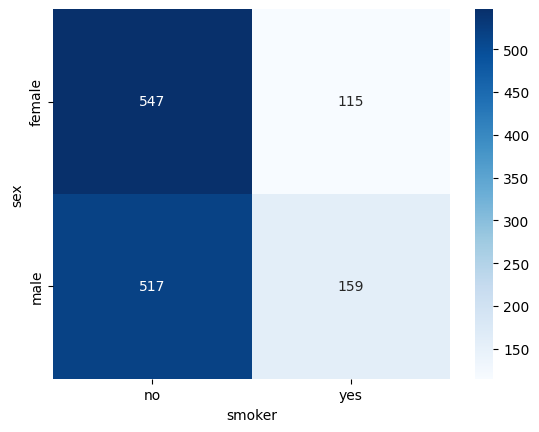

In [90]:
# 열지도(heatmap)
sns.heatmap(agg, cmap='Blues', annot=True, fmt='d')
plt.show();

In [91]:
# 행 백분율
pd.crosstab(df_ins['sex'], df_ins['smoker'], normalize='index', margins=True)

smoker,no,yes
sex,,
female,0.826284,0.173716
male,0.764793,0.235207
All,0.795217,0.204783


In [92]:
# 열 백분율
pd.crosstab(df_ins['sex'], df_ins['smoker'], normalize='columns', margins=True)

smoker,no,yes,All
sex,,,
female,0.514098,0.419708,0.494768
male,0.485902,0.580292,0.505232


<br>

## 5.1. 카이제곱검정을 활용한 독립성 검정

### 예시1) 성별에 따른 흡연여부에 차이가 있을까?

In [93]:
# 귀무 가설(H0) : 두 범주형 변수가 독립이다(상관 없다)
# 대립 가설(H1) : 두 범주형 변수가 독립이 아니다(상관이 있다)

In [94]:
# 위에서 구한 성별, 흡연여부에 따른 교차표
agg = pd.crosstab(df_ins['sex'], df_ins['smoker'])
agg

smoker,no,yes
sex,,
female,547,115
male,517,159


In [95]:
# 독립성 검정
chi2, p, dof, expected = stats.chi2_contingency(agg)

# print results
print('카이제곱 값:', chi2, '\n')   # 카이제곱값
print('p-value:', p, '\n')       # p-value
print('자유도:', dof, '\n')        # 자유도 = (2-1)x(2-1)
print('독립을 가정한 교차표:\n', expected) 

카이제곱 값: 7.39291081459996 

p-value: 0.006548143503580696 

자유도: 1 

독립을 가정한 교차표:
 [[526.43348281 135.56651719]
 [537.56651719 138.43348281]]


In [96]:
# 카이제곱검정의 자유도
# (r행과 c열이 있는 교차표의 경우) 자유도 = (r-1)x(c-1)

In [97]:
# 결과값의 분할 저장
# _ : 사용 안 할 변수를 저장하는 임시 변수
chi2val, pvalue, _, _ = stats.chi2_contingency(agg)

pvalue

0.006548143503580696

In [98]:
# 해석 : p-value가 0.05보다 작으므로, 성별과 흡연여부에 연관성이 있다.

### 예시2) 성별에 따른 커피, 차 선호도에 연관성이 있을까?

In [99]:
# 귀무가설(H0) : 성별 간 커피, 차 선호도에 연관성이 없다.

In [100]:
import numpy as np
from scipy import stats

                  #커피 #차  
drinks = np.array([[30, 20],  # 남성
                   [40, 10]]) # 여성
drinks

array([[30, 20],
       [40, 10]])

In [101]:
# [[30, 20]   50
#  [40, 10]]  50
#   70  30    100

# 독립을 가정한 교차표
# [[35 15]  50   
#   35 15]] 50   
#   70 30   100  

In [102]:
# 카이제곱검정 수행
chi2, p, dof, expected = stats.chi2_contingency(drinks)

# print results
print('카이제곱 값:', chi2, '\n')   # 카이제곱값
print('p-value:', p, '\n')       # p-value
print('자유도:', dof, '\n')        # 자유도 = (2-1)x(2-1)
print('독립을 가정한 교차표:\n', expected) 

카이제곱 값: 3.8571428571428577 

p-value: 0.04953461343562649 

자유도: 1 

독립을 가정한 교차표:
 [[35. 15.]
 [35. 15.]]


In [103]:
# 해석 : p-value < 0.05 이므로, 귀무가설을 기각한다.
# 즉, 남성과 여성 사이에 커피/차 선호도에 유의미한 차이가 있다.

<br>
<br>

#### [실습] 두 범주형 변수의 독립성 검정 

1. df_sp에서 'race/ethnicity'와 'parental level of education'의 교차표 만들기
2. 1의 교차표에서 열지도 그리고 의미 파악하기
3. 1의 교차표와 `chi2_contingency()`로 'race/ethnicity'와 'parental level of education'의 독립성 검정하기





#### End of script